In [707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector as selector

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [708]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [709]:
houses_df = houses_df[houses_df["SalePrice"] < 700000]
houses_df = houses_df[houses_df["LotArea"] < 100000]

In [710]:
houses_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1454.000000,1454.000000,1198.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1446.000000,1454.000000,...,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,731.119670,56.856946,69.879800,10084.839752,6.093535,5.574966,1971.253095,1984.852132,102.737206,440.001376,...,93.530949,46.664374,22.044704,3.423659,15.123109,2.388583,42.843191,6.324622,2007.817056,179822.555708
std,421.854142,42.220998,24.044457,5642.853408,1.377551,1.114050,30.249466,20.658752,178.815004,452.716016,...,124.163458,66.351284,61.228893,29.376979,55.864001,37.560994,496.697866,2.705145,1.329774,76460.500441
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.250000,20.000000,59.000000,7536.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,732.500000,50.000000,69.000000,9458.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,380.500000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162900.000000
75%,1095.750000,70.000000,80.000000,11546.250000,7.000000,6.000000,2000.750000,2004.000000,164.750000,706.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213430.000000
max,1460.000000,190.000000,313.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000


In [711]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df)
numerical_columns.remove('Id')
print(numerical_columns)
categorical_columns = categorical_columns_selector(houses_df)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

In [712]:
null_counts = houses_df.isnull().sum()
# print(null_counts)
null_counts = null_counts[null_counts > 0]
print(null_counts)

LotFrontage      256
Alley           1363
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1448
Fence           1174
MiscFeature     1402
dtype: int64


In [713]:
nulls = []
for i in null_counts.index:
    print(i)
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [714]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

for i in null_counts.index:
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

# Define the number of categories
num_categories = 3

category_names = ['Economica', 'Intermedia', 'Cara']

houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)
dummies = pd.get_dummies(houses_df['Precio_Categoria'])

houses_df = pd.concat([houses_df, dummies], axis=1)

print(houses_df[['Economica', 'Intermedia', 'Cara']])
print("Economica: ", houses_df['Economica'].value_counts()[1])
print("Intermedia: ", houses_df['Intermedia'].value_counts()[1])
print("Cara: ", houses_df['Cara'].value_counts()[1])

      Economica  Intermedia  Cara
0             0           0     1
1             0           1     0
2             0           0     1
3             0           1     0
4             0           0     1
...         ...         ...   ...
1455          0           1     0
1456          0           0     1
1457          0           0     1
1458          0           1     0
1459          0           1     0

[1460 rows x 3 columns]
Economica:  487
Intermedia:  490
Cara:  483


In [715]:
houses_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Economica,Intermedia,Cara
count,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,0.0,57.623288,10516.828082,0.0,0.0,0.0,0.0,0.0,...,0.0,43.489041,6.321918,2007.815753,0.0,0.0,180921.195890,0.333562,0.335616,0.330822
std,421.610009,42.300571,0.0,34.664304,9981.264932,0.0,0.0,0.0,0.0,0.0,...,0.0,496.123024,2.703626,1.328095,0.0,0.0,79442.502883,0.471647,0.472367,0.470670
min,1.000000,20.000000,0.0,0.000000,1300.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,2006.000000,0.0,0.0,34900.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,0.0,42.000000,7553.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,5.000000,2007.000000,0.0,0.0,129975.000000,0.000000,0.000000,0.000000
50%,730.500000,50.000000,0.0,63.000000,9478.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,6.000000,2008.000000,0.0,0.0,163000.000000,0.000000,0.000000,0.000000
75%,1095.250000,70.000000,0.0,79.000000,11601.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,8.000000,2009.000000,0.0,0.0,214000.000000,1.000000,1.000000,1.000000
max,1460.000000,190.000000,0.0,313.000000,215245.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,15500.000000,12.000000,2010.000000,0.0,0.0,755000.000000,1.000000,1.000000,1.000000


In [716]:
# lista = {}
# for column in houses_df.columns:
#     zero_count = (houses_df[column] == 0).sum()
#     if zero_count > 1450:
#         lista[column] = zero_count

# for lis in lista:
#     print(lis, lista[lis])

# for lis in lista:
#     houses_df = houses_df.drop(lis, axis=1)

In [717]:
y = houses_df.pop("Cara")
X = houses_df
X.drop(["Economica", "Intermedia", "Precio_Categoria"], axis=1, inplace=True)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [718]:
logReg = LogisticRegression(solver='liblinear')
result = logReg.fit(X_train[numerical_columns],y_train)

In [719]:
y_pred = logReg.predict(X_test[numerical_columns])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test[numerical_columns], y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [720]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [721]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.995205 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.992922 (0.007180) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.991096 (0.008509) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.995205 (0.006164) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.992922 (0.007180) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992466 (0.007779) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.994749 (0.006298) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.993379 (0.006730) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.991781 (0.007162) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.995205 (0.006413) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.994749 (0.006542) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.991553 (0.008043) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.994064 (0.006554) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.995205 (0.006164) wit

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       274
           1       0.99      0.98      0.98       164

    accuracy                           0.99       438
   macro avg       0.99      0.99      0.99       438
weighted avg       0.99      0.99      0.99       438



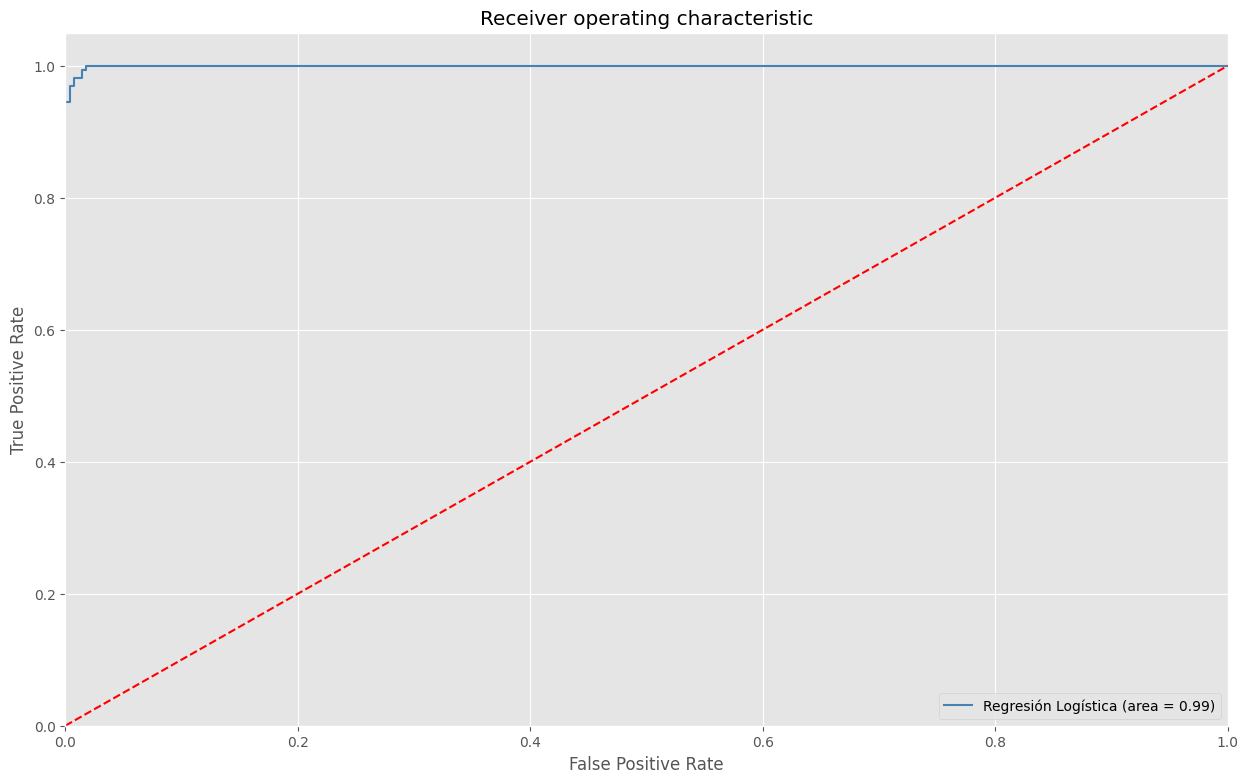

In [722]:
ypred = grid_search.predict(X_test)
print(classification_report(y_test,y_pred))

logit_roc_auc = roc_auc_score(y_test, logReg.predict(X_test[numerical_columns]))
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test[numerical_columns])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()